
#  Projet Speed Dating


#  Informations sur le Dataset

Les données ont été recueillies auprès des participants à des événements expérimentaux de speed dating de 2002 à 2004. Au cours des événements, les participants auraient un « premier rendez-vous » de quatre minutes avec tous les autres participants du sexe opposé. À la fin de leurs quatre minutes, on a demandé aux participants s’ils aimeraient revoir leur date. On leur a également demandé d’évaluer leur date sur six attributs : attractivité, sincérité, intelligence, plaisir, ambition et intérêts partagés. 

# Importation des Bibliothèques

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#  Chargement du Dataset. Manipulation du Dataset

In [3]:
data_complet=pd.read_csv("Speed_Dating_Data.csv", encoding= 'unicode_escape') #chargement du dataset

In [4]:
print("La tête du DataSet complet")
data_complet.head() #affiche le dataset

La tête du DataSet complet


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Les dimensions du dataset sont de : {}".format(data_complet.shape)) #dimension du dataset

Les dimensions du dataset sont de : (8378, 195)


In [6]:
nan = pd.DataFrame(data_complet.isnull().sum(), columns= ['nan_count']) #On regarde les données manquantes 
nan

,nan_count
iid,0
id,1
gender,0
idg,0
condtn,0
...,...
attr5_3,6362
sinc5_3,6362
intel5_3,6362
fun5_3,6362


### <font color='green'>Attention, les iid sont représentés plusieurs fois car chaque participant a réalisé plusieurs dates. Le code ci-dessous permet de récupérer les caractéristiques propres aux participants. Soit 552 participants</font>

In [14]:
caracteristique = ['gender', 'age', 'field',
       'race', 'imprace', 'imprelig', 'from', 'goal', 'date', 'go_out', 'career',
        'sports', 'tvsports', 'exercise', 'dining', 'museums','career',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum'] #je récupère les caractéristiques propre à chaque particitpant. 
data_reduit = data_complet[['iid','wave'] + caracteristique].drop_duplicates() 
#le drop_duplicates va permettre de supprimer les participants qui apparaissent plusieurs fois dans le dataset

In [15]:
data_reduit['gender'] = data_reduit['gender'].apply(lambda x : 'Femme' if x == 0 else 'Homme')
data_reduit['race'] = data_reduit['race'].apply(lambda x : 'Africaine' if x == 1
                                               else 'Européenne' if x == 2
                                               else 'Latino' if x == 3
                                               else 'Asiatique' if x == 4
                                               else 'Americain' if x == 5
                                               else 'Autre')
data_reduit['goal'] = data_reduit['goal'].apply(lambda x : 'Soirée amusante' if x == 1
                                               else 'Rencontrer de nouvelles personne' if x ==2
                                               else 'Obtenir un rdv' if x == 3
                                               else 'Pvoir une relation sérieuse' if x == 4
                                               else "Pour dire je l'ai fait" if x == 5
                                               else 'Autre')
data_reduit['go_out'] = data_reduit['go_out'].apply(lambda x : 'Plusieurs fois par semaine' if x == 1
                                                   else '2 fois par semaine' if x == 2
                                                   else '1 fois par semaine' if x == 3
                                                   else '2 fois par mois' if x == 4
                                                   else '1 fois par mois' if x == 5
                                                   else 'Quelque fois par an' if x == 6
                                                   else 'Jamais')
# L'objectif ici est de changer la valeur des variables catégorielles pour avoir un dataset lisible

In [16]:
print('Changement des variables catégorielles 1,2,3... Par leurs valeurs \nVoici la tête du Dataset avec les changements')
data_reduit.head()

Changement des variables catégorielles 1,2,3... Par leurs valeurs 
Voici la tête du Dataset avec les changements


,iid,wave,gender,age,field,race,imprace,imprelig,from,goal,...,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum
0,1,1,Femme,21.0,Law,Asiatique,2.0,4.0,Chicago,Rencontrer de nouvelles personne,...,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0
10,2,1,Femme,24.0,law,Européenne,2.0,5.0,Alabama,Soirée amusante,...,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0
20,3,1,Femme,25.0,Economics,Européenne,8.0,4.0,Connecticut,Autre,...,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0
30,4,1,Femme,23.0,Law,Européenne,1.0,1.0,Texas,Soirée amusante,...,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0
40,5,1,Femme,21.0,Law,Européenne,8.0,1.0,Bowdoin College,Rencontrer de nouvelles personne,...,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0


In [18]:
data_reduit['race'].unique()  # test des valeurs sur la variable race

array(['Asiatique', 'Européenne', 'Autre', 'Latino', 'Africaine'],
      dtype=object)

In [17]:
# séparation en deux datasets homme et femme 
femme = data_complet.loc[data_complet.gender == 0, :]
homme = data_complet.loc[data_complet.gender == 1, :]

# <font color='blue'>Statistiques Descriptives du Dataset</font>

### Âge, genre, origines, ambitions

In [19]:
print("La moyenne d'âge (année) par genre est de :")
print(data_reduit.groupby('gender')['age'].mean().round(1))

# Utilisation de groupby et mean pour connaitre l'âge moyen des participants

La moyenne d'âge (année) par genre est de :
gender
Femme    26.1
Homme    26.6
Name: age, dtype: float64


Text(0.5, 1.0, "Boxplot : Distidution de l'âge en fonction du genre")

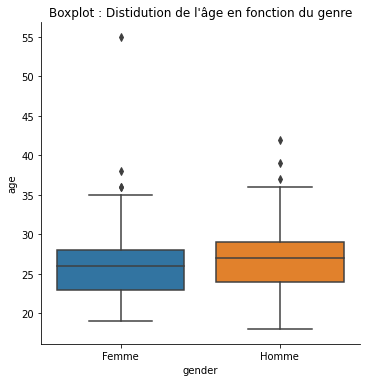

In [12]:
sns.catplot(x = 'gender', y = 'age', data = data_reduit, kind = 'box')
plt.title("Boxplot : Distidution de l'âge en fonction du genre")

C:\Users\marti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Les origines les plus représentées dans ce Dataset sont : Européen et Asiatique


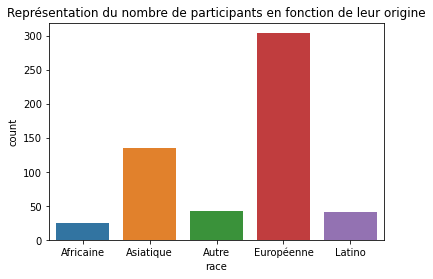

In [13]:
sns.countplot(data_reduit['race'].sort_values() )
plt.title("Représentation du nombre de participants en fonction de leur origine")
print("Les origines les plus représentées dans ce Dataset sont : Européen et Asiatique")


([<matplotlib.patches.Wedge at 0x1bc706827f0>,
 [Text(1.0879354682541844, 0.16246974153530405, 'Africaine'),
  Text(0.5262979460096839, 0.9659246720246811, 'Asiatique'),
  Text(-0.5481884804734649, 0.9536715314384685, 'Autre'),
  Text(-0.6581780179425973, -0.8813635440027879, 'Européenne'),
  Text(1.0686107038707322, -0.2609045104495096, 'Latino')],
 [Text(0.5934193463204642, 0.08861985901925674, '4.7%'),
  Text(0.28707160691437306, 0.5268680029225533, '24.7%'),
  Text(-0.29901189844007176, 0.5201844716937101, '7.8%'),
  Text(-0.3590061916050531, -0.4807437512742479, '55.2%'),
  Text(0.582878565747672, -0.14231155115427793, '7.6%')])

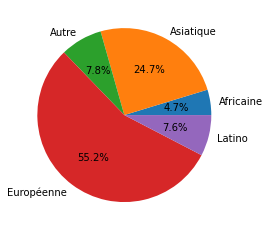

In [14]:
labels = 'Africaine', 'Asiatique', 'Autre','Européenne', 'Latino'
sum_africain = 0
sum_asiatique = 0
sum_autre = 0
sum_europeen = 0
sum_latino = 0
size = []
for i in data_reduit['race']:
    if i == 'Africaine':
        sum_africain += 1
    elif i == 'Asiatique' :
        sum_asiatique += 1
    elif i == 'Autre':
        sum_autre += 1
    elif i == 'Européenne':
        sum_europeen += 1
    else :
        sum_latino += 1
plt.pie([sum_africain,sum_asiatique,sum_autre,sum_europeen,sum_latino], labels=labels, autopct='%1.1f%%')

Les participants font des Speed Dating pour rencontrer principalement de nouvelles personnes sans prise de tête 
Il y a peu de différence entre les homme et les femmes


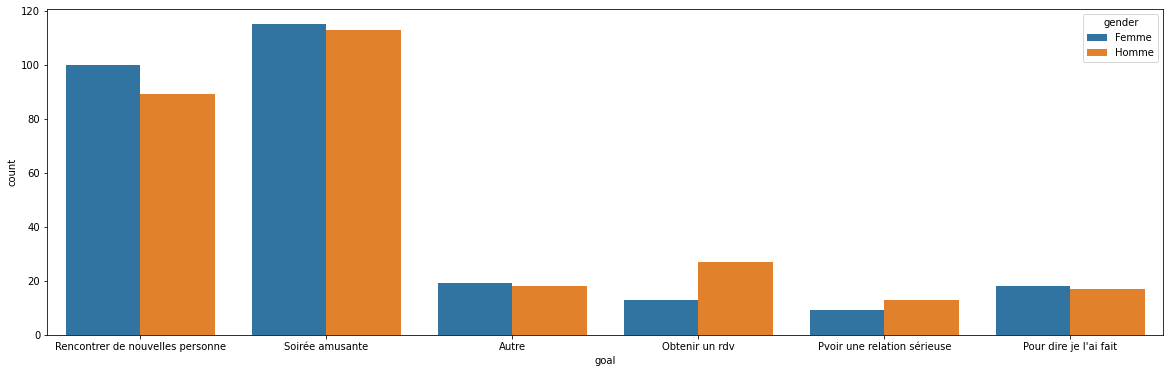

In [15]:
plt.figure(figsize = (20, 6))
ax = sns.countplot(x="goal", hue = 'gender', data=data_reduit)
print("Les participants font des Speed Dating pour rencontrer principalement de nouvelles personnes sans prise de tête \nIl y a peu de différence entre les homme et les femmes") 

# Quels facteurs va influencer la probabilité d'avoir un deuxième rendez-vous

### L'influence du numéro du participant sur le match, Incroyable ! 
### Attentin, prendre en compte que les id jusqu'à 10, en effet l'ensemble des waves contiennent au moins 10 participants de chaque sex

In [20]:
no_love_count = len(data_complet[(data_complet['dec_o']==0) & (data_complet['dec']==1)]) 
+ len(data_complet[(data_complet['dec_o']==1) & (data_complet['dec']==0)]) # on fait le compte des dates où un des participant à mis 0 et l'autre 1
coeur_brise = no_love_count / len(data_complet.index) # on divise le nombre de date sans réussite par le nombre total de date


print("Il y a {:.2f}% de participants qui ont le coeur brisé. Ils voulaient un deuxième rendez-vous mais ce n'est pas reciproque".format(coeur_brise*100))

Il y a 25.52% de participants qui ont le coeur brisé. Ils voulaient un deuxième rendez-vous mais ce n'est pas reciproque


In [17]:
print("Statistique amusante !!! Avec le numéros 4 et 9 vous augmentez la probilité de faire un match !! ")
data_complet.groupby('id')['match'].sum().sort_values(ascending = False)

Statistique amusante !!! Avec le numéros 4 et 9 vous augmentez la probilité de faire un match !! 


id
4.0     102
9.0     102
6.0      98
8.0      97
2.0      96
5.0      84
7.0      84
1.0      83
10.0     70
3.0      66
16.0     66
11.0     64
12.0     58
14.0     56
15.0     54
13.0     50
17.0     45
18.0     37
19.0     32
20.0     22
22.0      8
21.0      6
Name: match, dtype: int64

In [21]:
pcm = (sum(data_complet.match)/len(data_complet.match))*100
print ("pourcentage de match : {:.2f}% ".format(pcm))

pourcentage de match : 16.47% 


In [22]:
df1 = data_complet.iloc[:, 11:35]
df2 = data_complet.iloc[:, 39:43]
df3 = data_complet.iloc[:, 45:67]
df4 = data_complet.iloc[:, 97:107]

df = pd.concat([data_complet.iloc[:, 0],data_complet.iloc[:, 2],df1,df2,df3,df4], axis=1)
# on selctionne que certaines variables, celles ou il y à le moins de valeurs manquantes

In [23]:
df = df.dropna()
print(df.shape) # il reste que 62 variables

(5433, 62)


On remarque que pour la population femme, la décision ne ne pas poursuivre avec le participant est plus fréquente


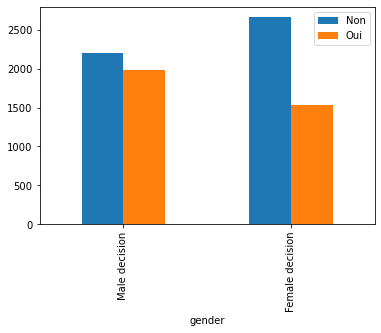

In [24]:
decision = pd.crosstab(data_complet.gender,data_complet.dec_o).plot(kind='bar')
plt.title =("Décision en fonction du genre")
plt.legend(["Non", "Oui"])
decision.set_xticklabels(['Male decision','Female decision'])

print("On remarque que pour la population femme, la décision ne ne pas poursuivre avec le participant est plus fréquente")

La matrice de corrélation est difficile à lire, mais on peut remarquer qu'il y a un cluster de corrélation entre la décision et les attibus


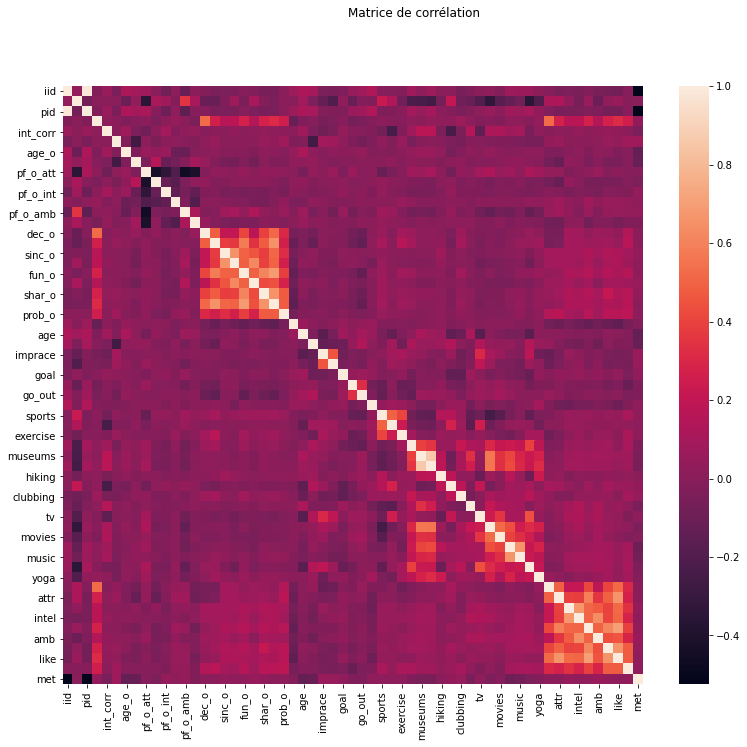

In [27]:
corr = df.corr()

plt.figure(figsize=(13,11))
sns.heatmap(corr)
plt.suptitle("Matrice de corrélation")


print("La matrice de corrélation est difficile à lire, mais on peut remarquer qu'il y a un cluster de corrélation entre la décision et les attibus")

Text(0.5, 0.98, 'Matrice de corrélation entre les attribus et la décision chez les hommes')

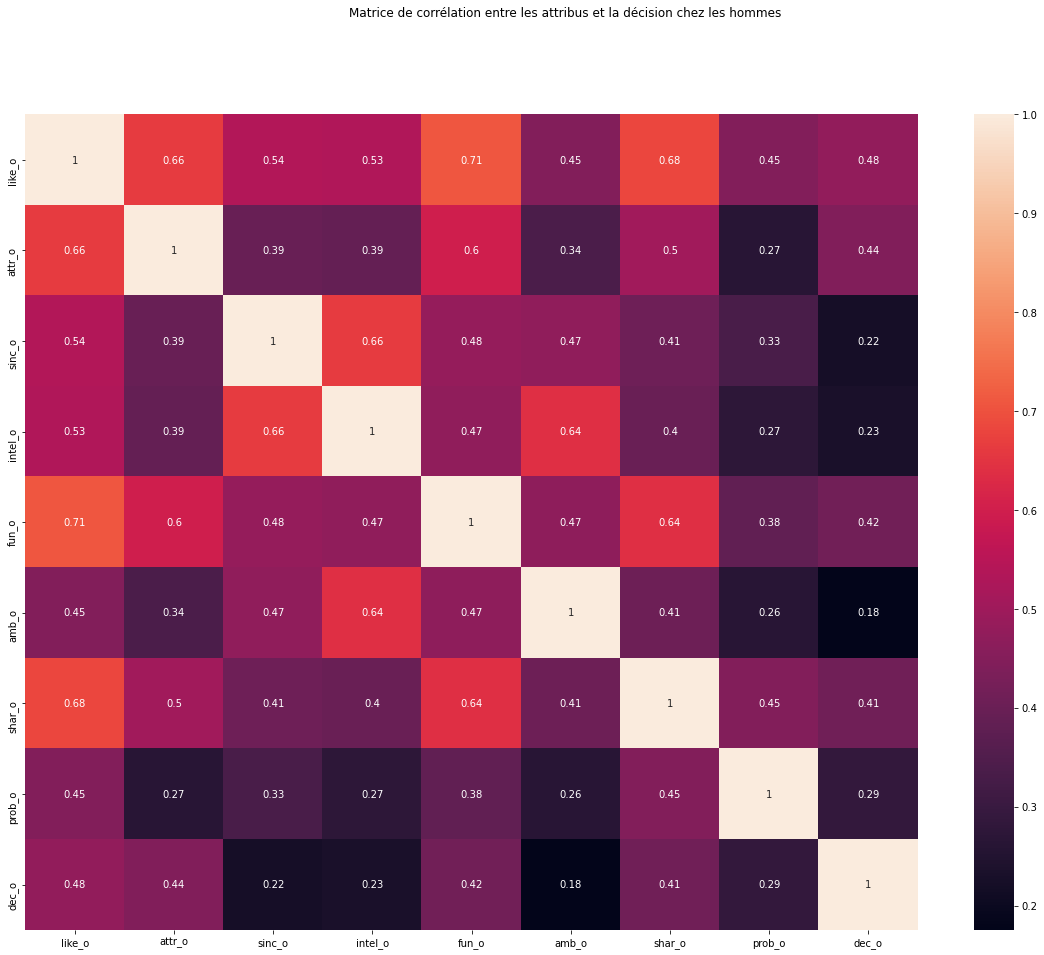

In [28]:
attribus = ["like_o", "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", "prob_o", "dec_o"]

data_attribus_homme = homme[attribus]
data_attribus_femme = femme[attribus]

corr_at_h = data_attribus_homme.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_at_h,annot=True)
plt.suptitle('Matrice de corrélation entre les attribus et la décision chez les hommes')

Text(0.5, 0.98, 'Matrice de corrélation entre les attribus et la décision chez les femmes')

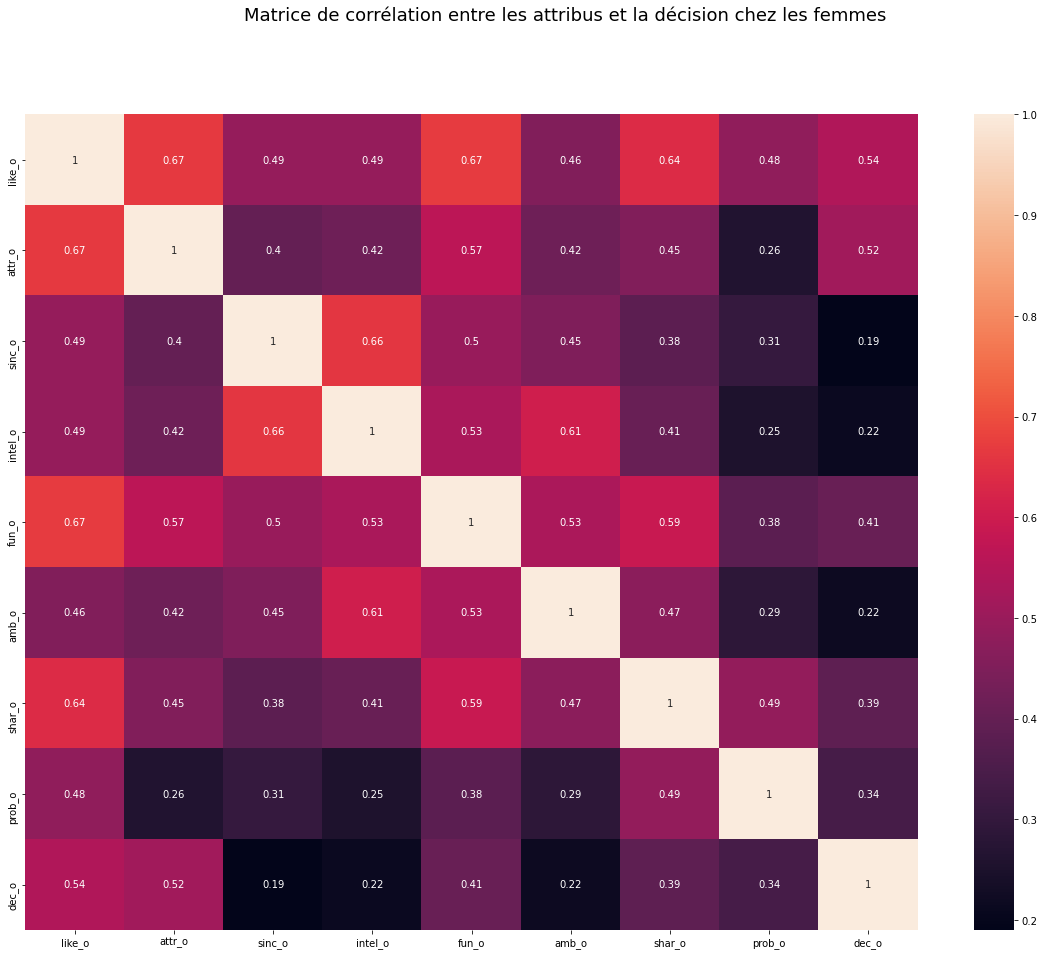

In [29]:
corr_at_f = data_attribus_femme.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_at_f,annot=True)
plt.suptitle('Matrice de corrélation entre les attribus et la décision chez les femmes', fontsize=18)

Avec ces deux matrices de corrélation on remarque que pour les femmes et les hommes, le choix se fait surtout sur le fun et les passions partagées !

#   Conclusion

## Dans ce projet on peut retrouver dans un premier temps les statistiques descriptives du Dataset.
## Dans un second temps, on cherche des facteurs favorisant d'obtenir un match !!
## Conclusion : soyez vous même, fun, partagez les valeurs de votre date! 
## Bon courage !! 